In [98]:
import matplotlib.pyplot as plt

In [99]:
import numpy as np
import math

In [108]:
def orig_dc_bound(N, dvc, d):
    return np.sqrt((float(8)/float(N))*np.log((4*(2*N)**(dvc))/float(d)))

In [110]:
def small_orig_dc_bound(N, dvc, d):
    return np.sqrt((float(8)/float(N))*np.log((4*(2**(2*N)))/float(d)))

In [112]:
def rademacher_penalty_bound(N,dvc,d):
    return np.sqrt(2*math.log(2*N*(N)**dvc)/float(N))+np.sqrt((2/float(N))*math.log(1/d)) + 1/float(N)

In [113]:
def small_rademacher_penalty_bound(N,dvc,d):
    return np.sqrt(2*math.log(2*N*2**N)/float(N))+np.sqrt((2/float(N))*math.log(1/d)) + 1/float(N)

In [116]:
def parrondo_and_van_den_broek_bound(N,dvc,d,eps):
    eps = 0
    eps_update = 1
    while eps != eps_update:
        eps = eps_update
        eps_update = np.sqrt((1/float(N))*(2*eps + math.log(6*((2*N)**dvc)/float(d))))
    return eps

In [117]:
def small_parrondo_and_van_den_broek_bound(N,dvc,d,eps):
    eps = 0
    eps_update = 1
    while eps != eps_update:
        eps = eps_update
        eps_update = np.sqrt((1/float(N))*(2*eps + math.log(6*(2**(2*N))/float(d))))
    return eps

In [103]:
def devroye_bound(N,dvc,d,eps):
    eps = 0
    eps_update = 1
    while eps != eps_update:
        eps = eps_update
        eps_update = np.sqrt((1/float(2*N))*(4*eps*(1+eps)+math.log(4*((N**2)**dvc))-math.log(float(d))))
    return eps

In [120]:
def small_devroye_bound(N,dvc,d,eps):
    eps = 0
    eps_update = 1
    while eps != eps_update:
        eps = eps_update
        eps_update = np.sqrt((1/float(2*N))*(4*eps*(1+eps)+math.log(4*(2**(N**2)))-math.log(float(d))))
    return eps

In [121]:
N = 10000
math.log(4*((N**2)**dvc))

922.4203315587381

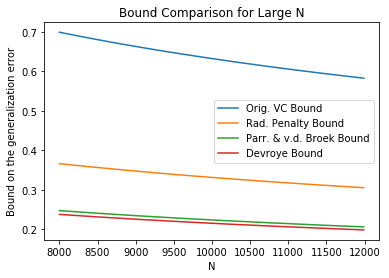

In [122]:
d = .05
dvc = 50
e = 1
N_vals = [i*10 for i in range(800,1200)]
og_bound = [orig_dc_bound(N,dvc,d) for N in N_vals]
rad_bound = [rademacher_penalty_bound(N,dvc,d) for N in N_vals]
par_bound = [parrondo_and_van_den_broek_bound(N,dvc,d,e) for N in N_vals]
dev_bound = [devroye_bound(N,dvc,d,e) for N in N_vals]

plt.plot(N_vals,og_bound, label='Orig. VC Bound')
plt.plot(N_vals, rad_bound, label = 'Rad. Penalty Bound')
plt.plot(N_vals, par_bound, label = 'Parr. & v.d. Broek Bound')
plt.plot(N_vals, dev_bound, label = 'Devroye Bound')
plt.legend()
plt.xlabel('N')
plt.ylabel('Bound on the generalization error')
plt.title('Bound Comparison for Large N')
plt.savefig('p2.jpg')
plt.show()

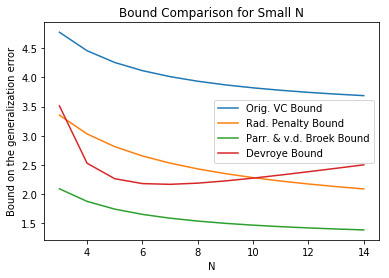

In [123]:
d = .05
dvc = 50
e = 0.05

N_vals = [i for i in range(3,15)]
og_bound = [small_orig_dc_bound(N,dvc,d) for N in N_vals]
rad_bound = [small_rademacher_penalty_bound(N,dvc,d) for N in N_vals]
par_bound = [small_parrondo_and_van_den_broek_bound(N,dvc,d,e) for N in N_vals]
dev_bound = [small_devroye_bound(N,dvc,d,e) for N in N_vals]

plt.plot(N_vals,og_bound, label='Orig. VC Bound')
plt.plot(N_vals, rad_bound, label = 'Rad. Penalty Bound')
plt.plot(N_vals, par_bound, label = 'Parr. & v.d. Broek Bound')
plt.plot(N_vals, dev_bound, label = 'Devroye Bound')
plt.legend()
plt.xlabel('N')
plt.ylabel('Bound on the generalization error')
plt.title('Bound Comparison for Small N')
plt.savefig('p3.jpg')
plt.show()